In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [110]:
# Reading the training dataset in a dataframe using Pandas
train = pd.read_csv("Training_Data.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("Testing_data.csv")

In [111]:
train.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1,0,120,80,13,15,18.0,20.0,10.0
2,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0,0,120,70,2,2,15.0,14.0,7.5
3,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0,0,120,80,3,4,16.0,14.0,7.0
4,0,36,74.1,165.0,27.2,15,78,28,11.20,2,...,0,0,0,110,70,9,6,16.0,20.0,8.0


In [112]:
test.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,36,65.0,161.5,24.9,15,74,20,11.7,2,...,0,0,0,120,70,3,5,15.0,14.0,3.7
1,0,33,58.5,159.0,23.1,13,72,20,11.0,2,...,0,0,0,120,80,7,6,15.0,18.0,7.1
2,1,25,74.0,152.0,32.0,17,72,18,11.7,4,...,1,1,1,120,80,15,8,20.0,21.0,8.0
3,0,38,80.5,154.0,33.9,13,78,22,11.4,2,...,0,0,0,120,80,1,3,14.0,20.0,3.9
4,0,31,52.4,159.0,20.7,17,72,18,12.7,2,...,0,0,0,120,80,0,2,0.0,17.0,5.6


In [113]:
# Checking the shape of the loaded dataset
print("Shape of the Training Dataset is",train.shape)
print(" ")
print("Shape of the Testing Dataset is",test.shape)

Shape of the Training Dataset is (432, 42)
 
Shape of the Testing Dataset is (109, 42)


In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              109 non-null    int64  
 1   Age (yrs)               109 non-null    int64  
 2   Weight (Kg)             109 non-null    float64
 3   Height(Cm)              109 non-null    float64
 4   BMI                     109 non-null    float64
 5   Blood Group             109 non-null    int64  
 6   Pulse rate(bpm)         109 non-null    int64  
 7   RR (breaths/min)        109 non-null    int64  
 8   Hb(g/dl)                109 non-null    float64
 9   Cycle(R/I)              109 non-null    int64  
 10  Cycle length(days)      109 non-null    int64  
 11  Marraige Status (Yrs)   109 non-null    float64
 12  Pregnant(Y/N)           109 non-null    int64  
 13  No. of abortions        109 non-null    int64  
 14  I   beta-HCG(mIU/mL)    109 non-null    fl

In [115]:
test.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.394495,31.706422,62.443119,157.473174,25.151376,13.871560,73.018349,19.192661,11.103578,2.458716,...,0.596330,0.596330,0.238532,115.779817,77.064220,6.605505,7.165138,14.633028,15.545872,8.400459
std,0.491000,4.974570,10.731577,5.994543,3.877371,1.836366,5.857856,1.417334,0.854285,0.844723,...,0.492899,0.492899,0.428155,5.659076,4.575043,4.363184,4.431607,3.538572,3.563928,2.072243
min,0.000000,21.000000,32.000000,144.000000,13.900000,11.000000,18.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,100.000000,70.000000,0.000000,0.000000,0.000000,0.000000,3.700000
25%,0.000000,28.000000,56.000000,152.000000,22.900000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,4.000000,13.000000,14.000000,7.000000
50%,0.000000,31.000000,61.000000,158.000000,24.800000,15.000000,72.000000,20.000000,11.000000,2.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,6.000000,7.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,27.200000,15.000000,74.000000,20.000000,11.800000,2.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,10.000000,10.000000,17.000000,18.000000,9.400000
max,1.000000,45.000000,104.000000,173.000000,38.500000,17.000000,82.000000,22.000000,13.400000,4.000000,...,1.000000,1.000000,1.000000,140.000000,80.000000,16.000000,20.000000,22.000000,22.000000,18.000000


In [116]:
test.isnull().sum()

PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [117]:
train["AMH(ng/mL)"] = pd.to_numeric(train["AMH(ng/mL)"], errors="coerce") 
train["II    beta-HCG(mIU/mL)"] = pd.to_numeric(train["II    beta-HCG(mIU/mL)"], errors="coerce")

In [118]:
test["AMH(ng/mL)"] = pd.to_numeric(test["AMH(ng/mL)"], errors="coerce") 
test["II    beta-HCG(mIU/mL)"] = pd.to_numeric(test["II    beta-HCG(mIU/mL)"], errors="coerce")

In [119]:
train = train.rename(columns=lambda x: x.strip())

In [120]:
test = test.rename(columns=lambda x: x.strip())

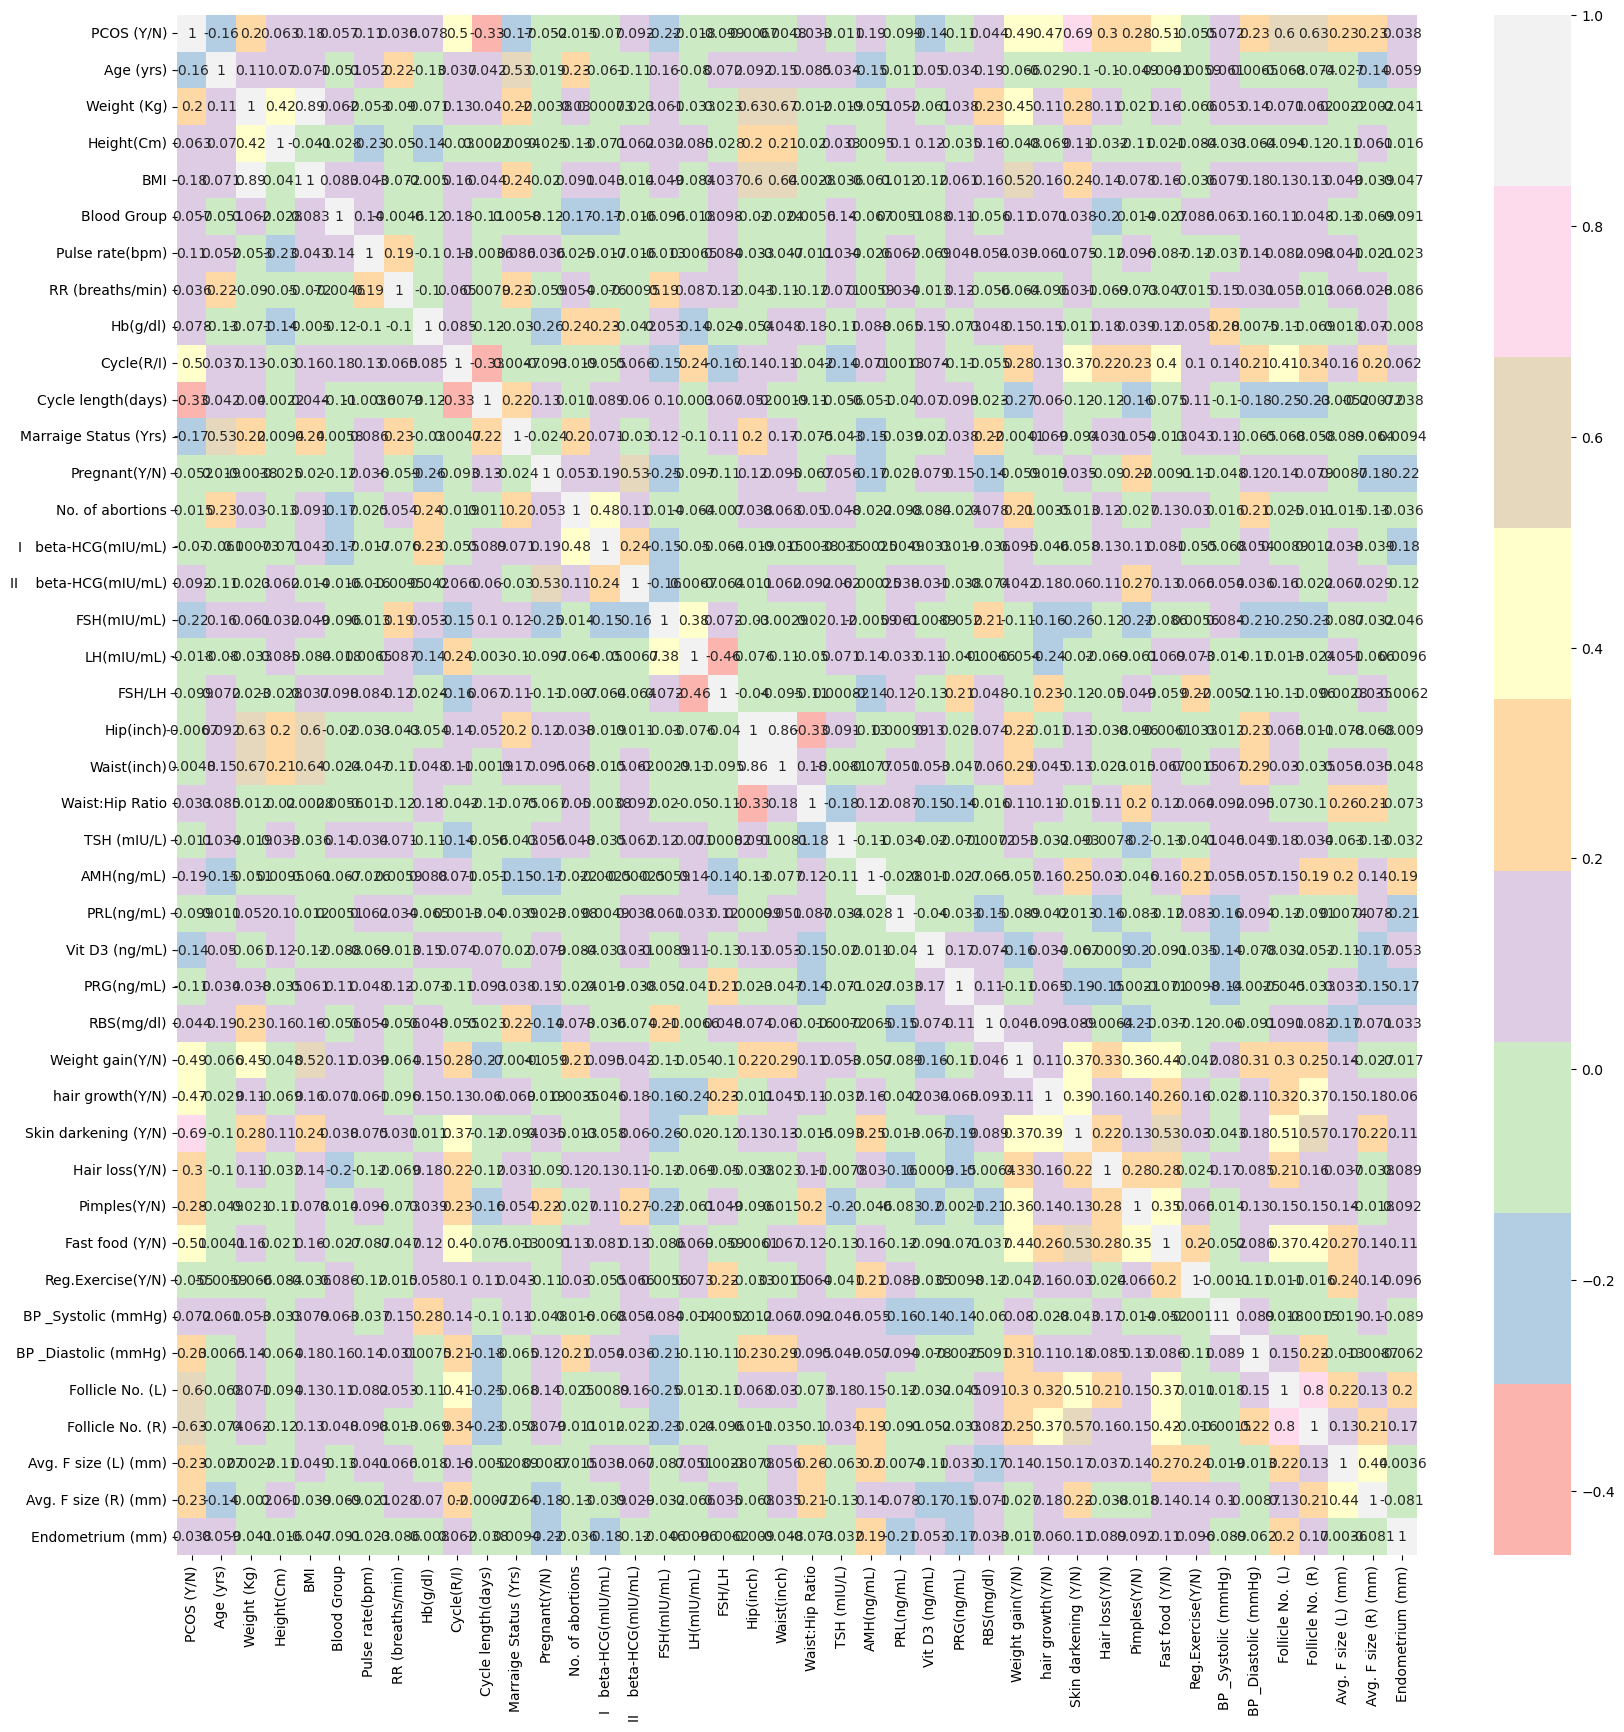

In [121]:
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(test.corr(), cmap="Pastel1", annot=True,)
  
plt.show()

In [122]:
numerical_variables = []
categorical_variables = []
for x in test.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [123]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'No. of abortions',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [124]:
numerical_variables

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

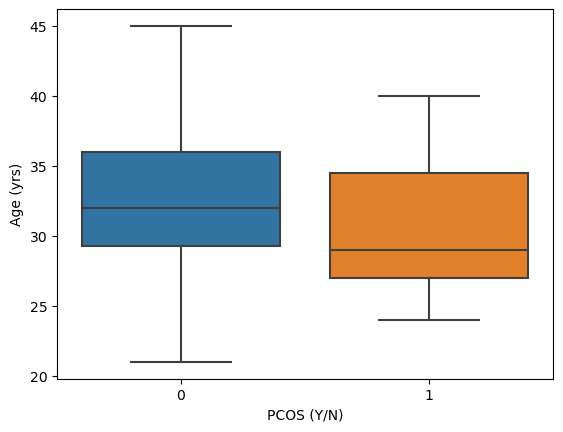

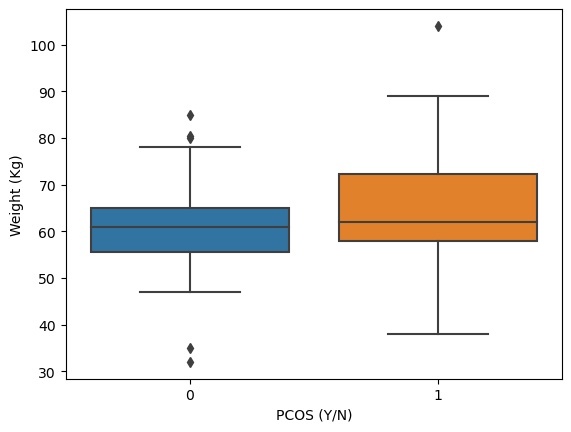

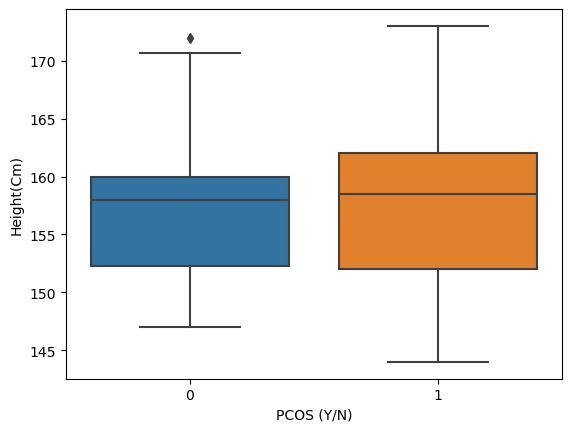

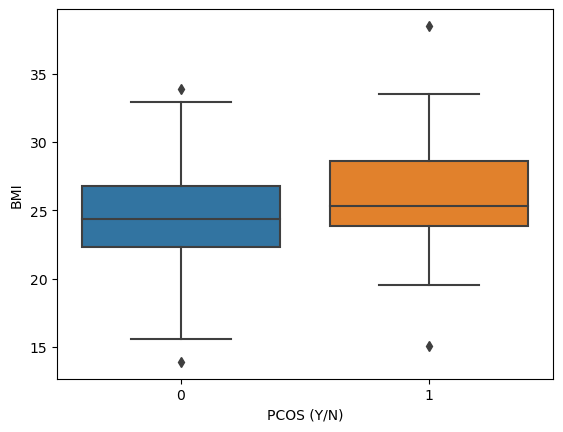

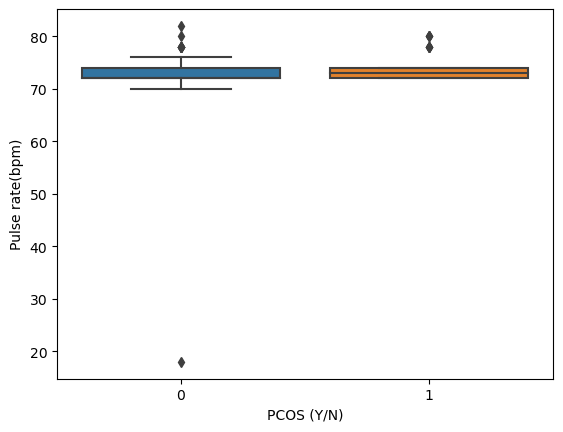

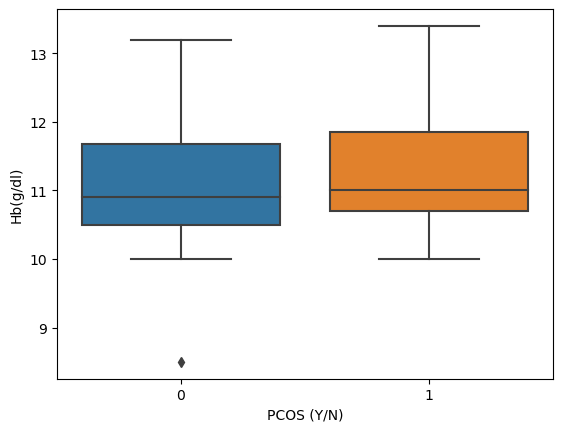

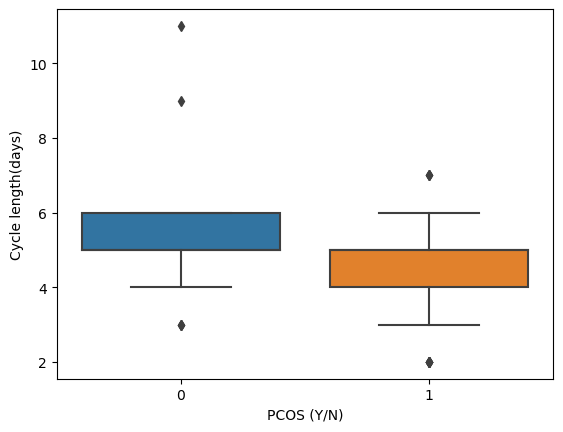

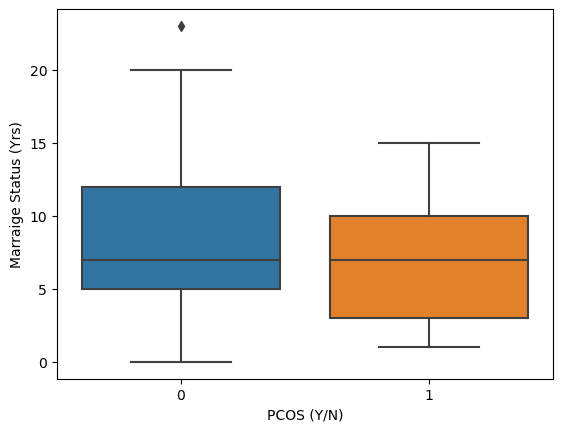

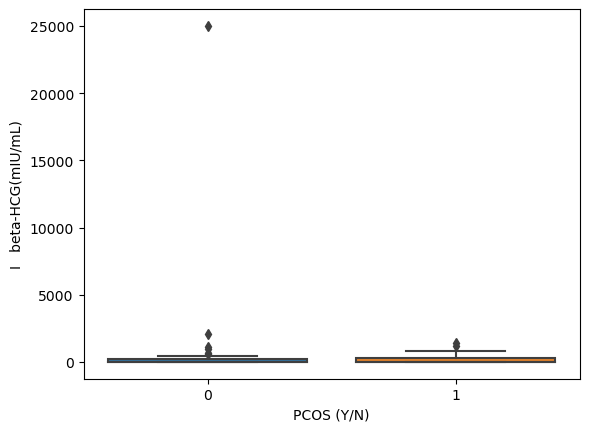

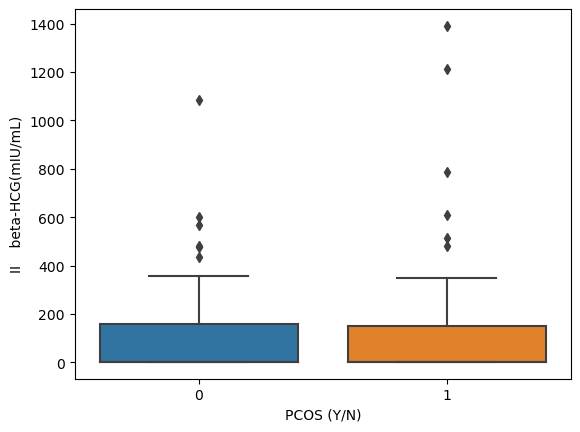

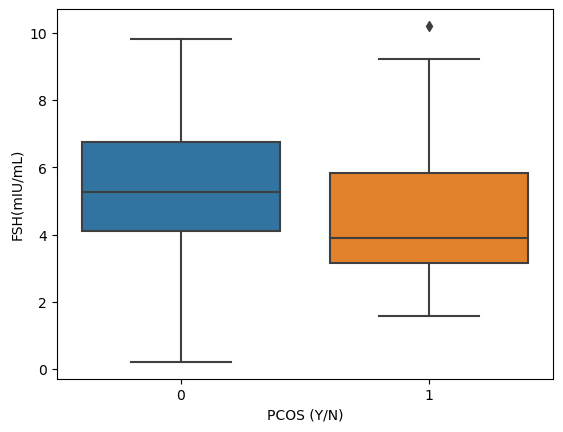

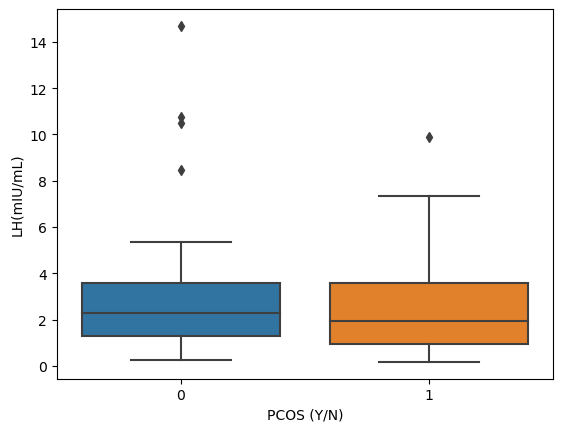

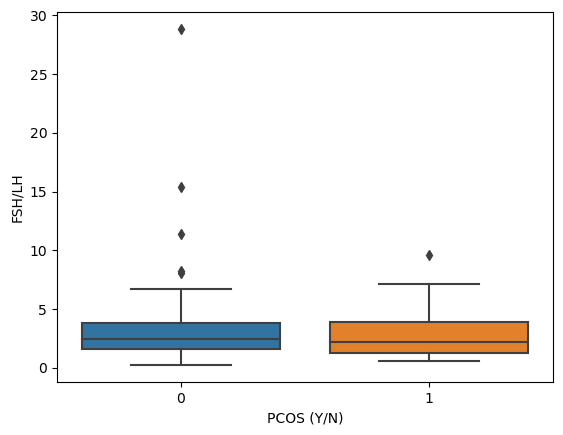

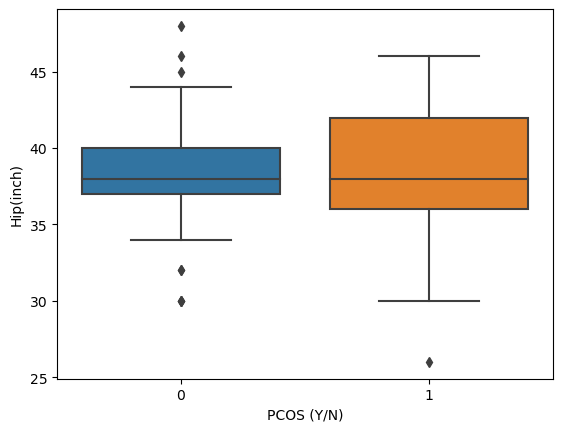

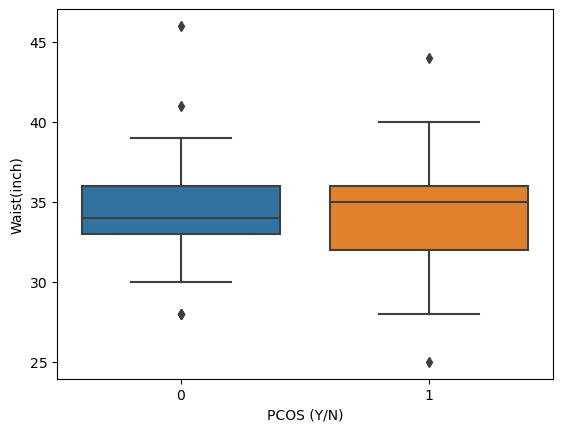

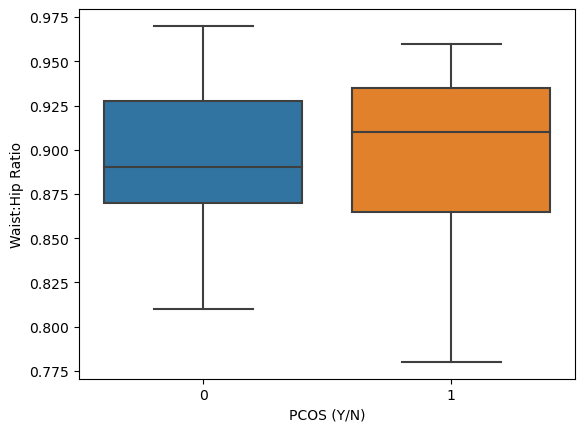

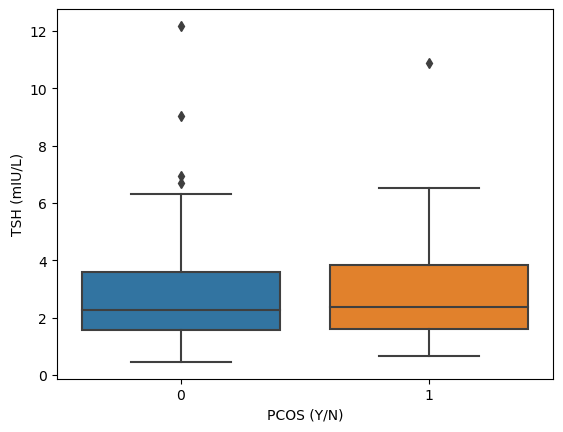

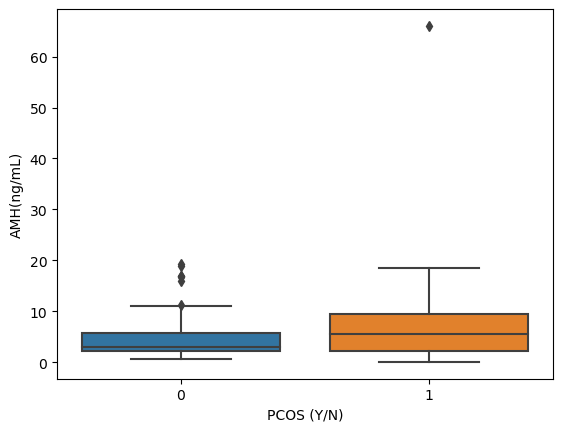

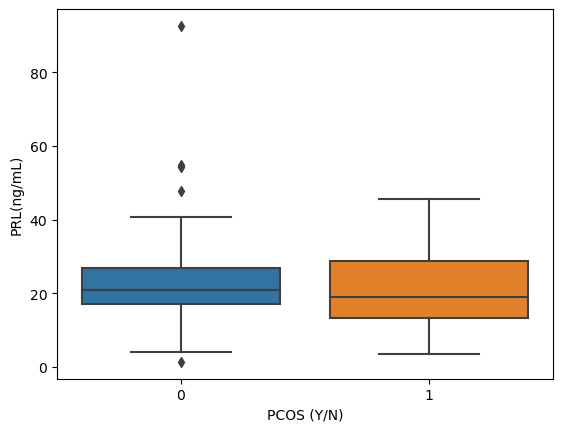

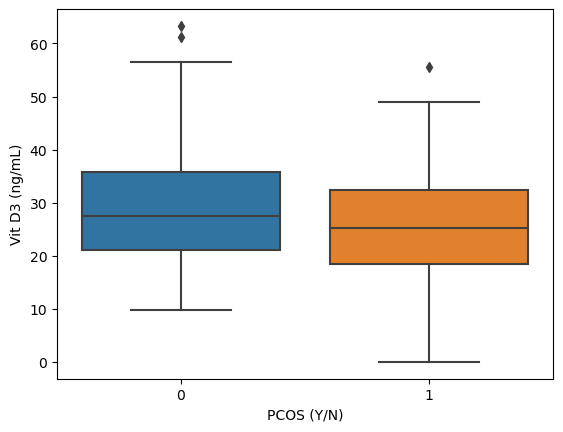

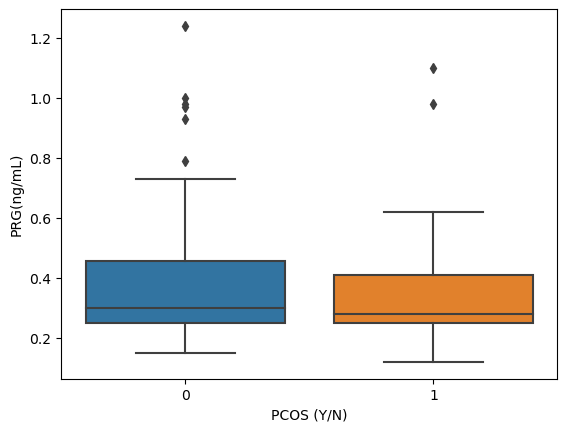

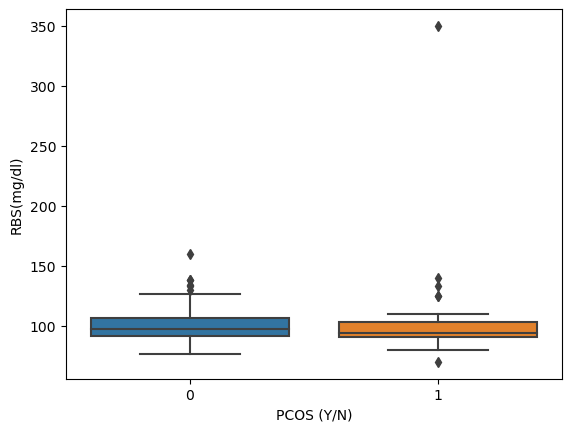

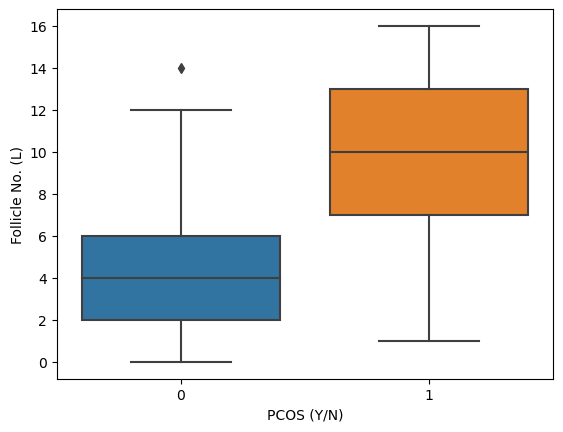

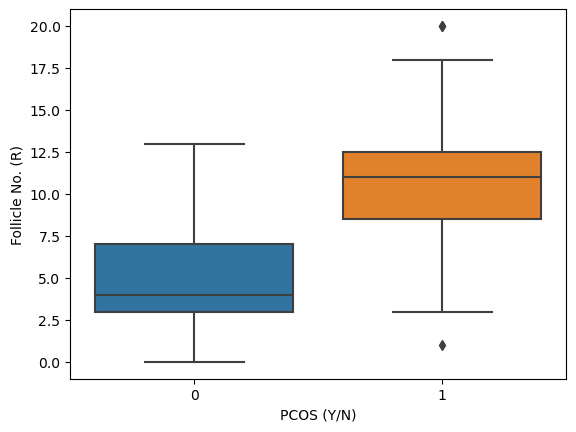

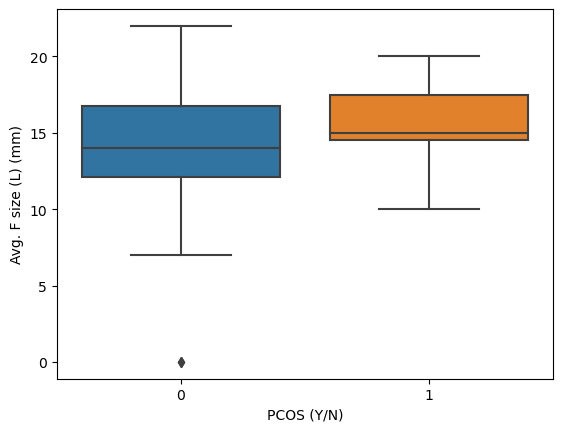

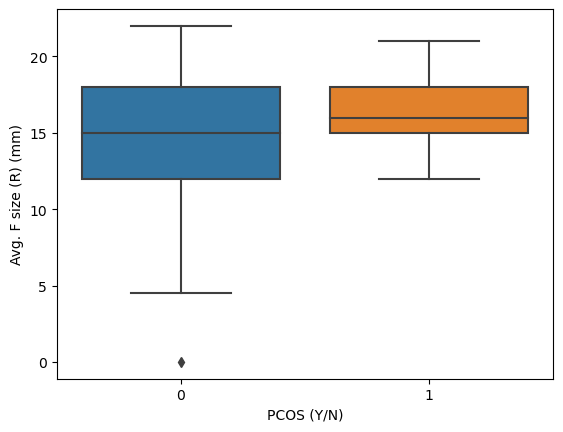

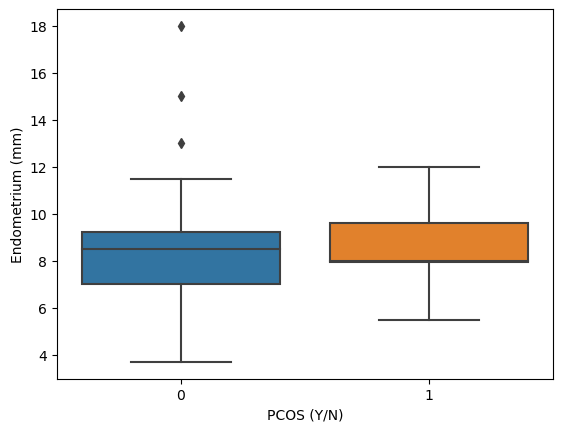

In [125]:
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=test)
    plt.show()

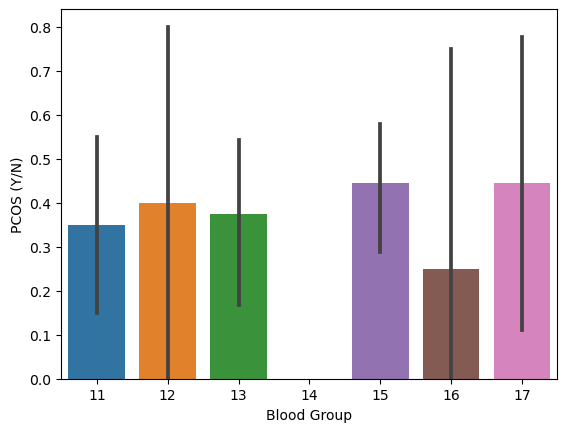

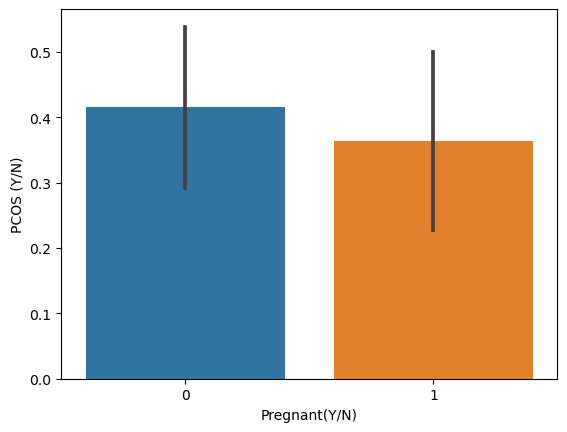

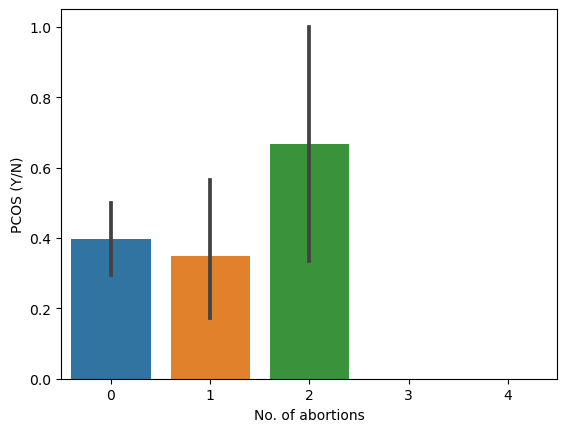

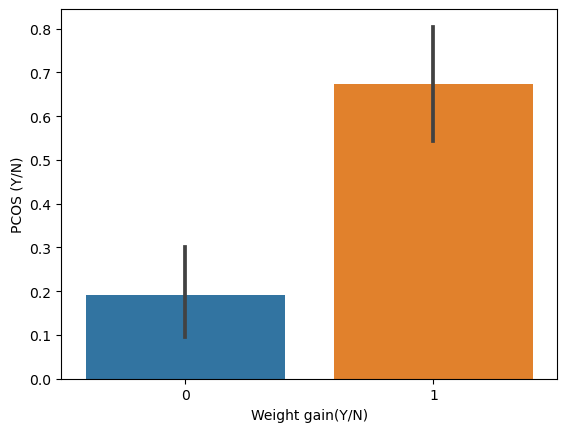

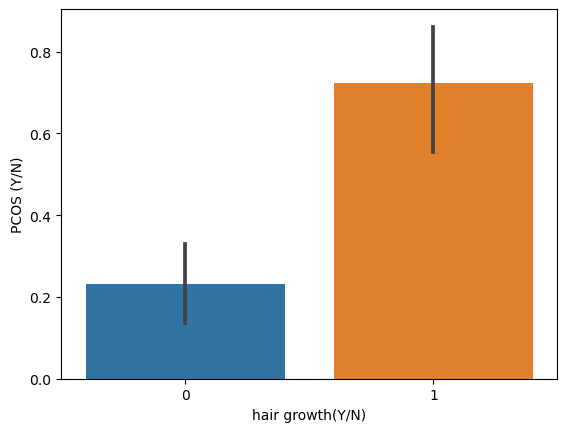

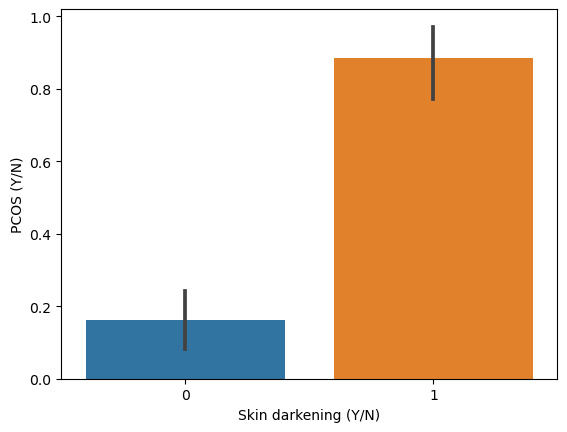

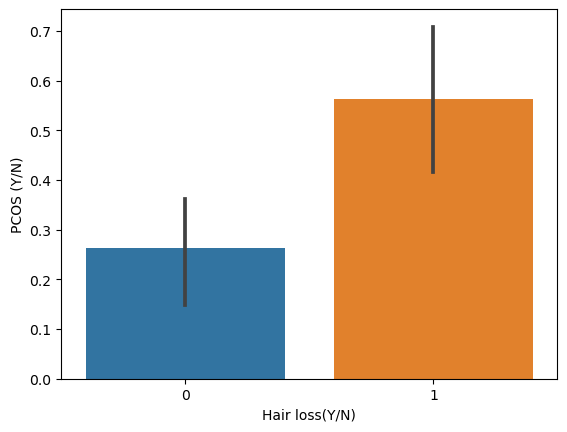

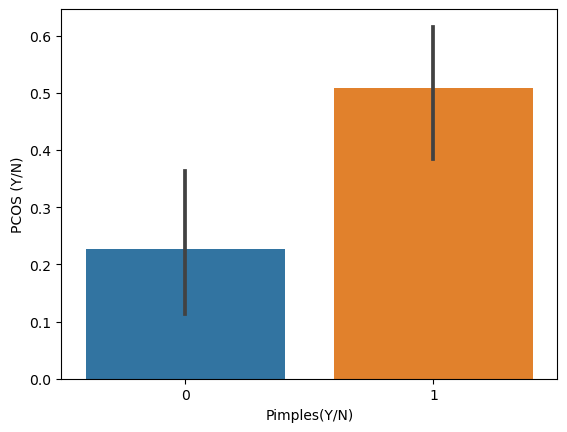

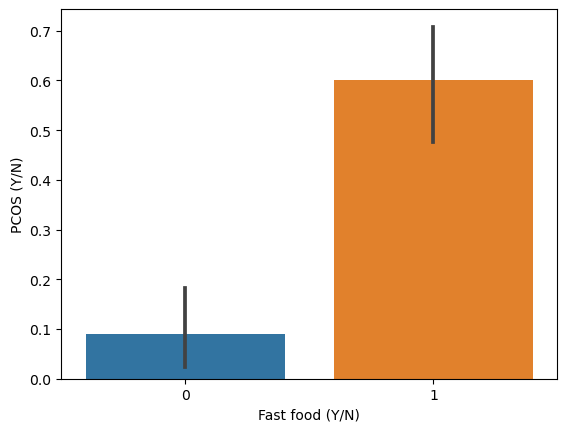

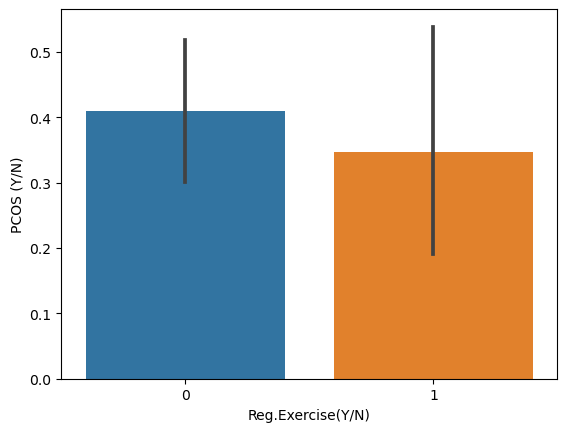

In [126]:
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = test)
        plt.show()

<AxesSubplot: xlabel='PCOS (Y/N)', ylabel='count'>

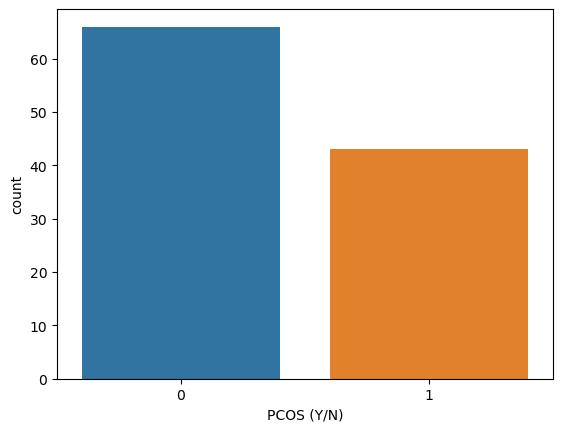

In [127]:
sns.countplot(x = "PCOS (Y/N)", data = test)

In [128]:
train["PCOS (Y/N)"].value_counts()

0    298
1    134
Name: PCOS (Y/N), dtype: int64

In [129]:
test["PCOS (Y/N)"].value_counts()

0    66
1    43
Name: PCOS (Y/N), dtype: int64

In [130]:
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1:]

In [131]:
y_test = test.iloc[:, 0]
X_test = test.iloc[:, 1:]

## Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
y_reg = logreg.predict(X_test)
Accuracy = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: ', Accuracy)

Accuracy of logistic regression classifier on test set:  0.8073394495412844


In [169]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.2660550458715596


In [134]:
print(classification_report(y_test,y_reg))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.79      0.70      0.74        43

    accuracy                           0.81       109
   macro avg       0.80      0.79      0.79       109
weighted avg       0.81      0.81      0.80       109



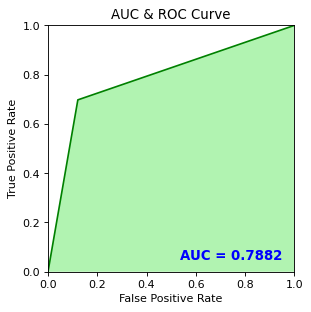

In [135]:
roc_auc = roc_auc_score(y_test, y_reg)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_reg)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Support Vector Machine

In [136]:
from sklearn.svm import SVC

linear_svc1000=SVC(kernel='rbf', C=1000.0, probability=True, gamma='scale')
linear_svc1000.fit(X_train.values,np.ravel(y_train))

SVC(C=1000.0, probability=True)

In [166]:
y_svc = linear_svc1000.predict(X_test)
Accuracy = linear_svc1000.score(X_test, y_test)
print('Accuracy of Support Vector Machine classifier on test set: ', Accuracy)

Accuracy of Support Vector Machine classifier on test set:  0.7339449541284404


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [170]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.2660550458715596


In [138]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81        66
           1       0.85      0.40      0.54        43

    accuracy                           0.73       109
   macro avg       0.78      0.67      0.68       109
weighted avg       0.76      0.73      0.71       109



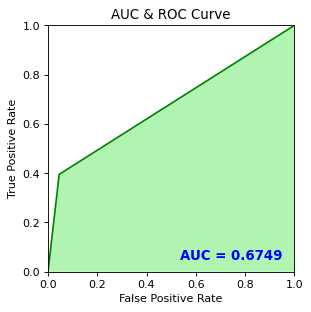

In [139]:
roc_auc = roc_auc_score(y_test, y_svc)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_svc)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=300,  criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0
                                  , bootstrap=True,oob_score=False, n_jobs=1, random_state=None,
                                  verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=300,
                       n_jobs=1)

In [176]:
y_rf = classifier.predict(X_test)
Accuracy = classifier.score(X_test, y_test)
print('Accuracy of Random Forest classifier on test set: ', Accuracy)

Accuracy of Random Forest classifier on test set:  0.8807339449541285


In [177]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.11926605504587151


In [142]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        66
           1       0.92      0.77      0.84        43

    accuracy                           0.88       109
   macro avg       0.89      0.86      0.87       109
weighted avg       0.88      0.88      0.88       109



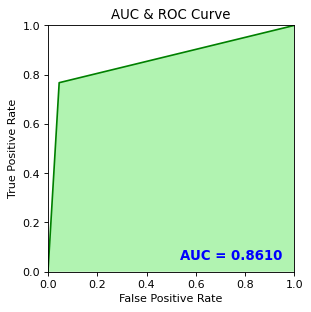

In [143]:
roc_auc = roc_auc_score(y_test, y_rf)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_rf)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## XG Boost

In [144]:
from xgboost import XGBClassifier

params = {
             'max_depth': 5,
             'alpha': 10,
             'learning_rate': 0.2,
             'n_estimators':300
         }

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

[12:26:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
y_xg = xgb_clf.predict(X_test)
Accuracy = xgb_clf.score(X_test, y_test)
print('Accuracy of XG Boost Classifier on test set: ', Accuracy)

Accuracy of XG Boost Classifier on test set:  0.8623853211009175


In [179]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.13761467889908252


In [146]:
print(classification_report(y_test,y_xg))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.85      0.79      0.82        43

    accuracy                           0.86       109
   macro avg       0.86      0.85      0.85       109
weighted avg       0.86      0.86      0.86       109



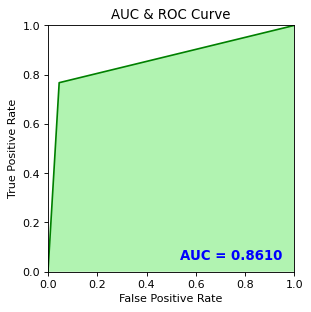

In [147]:
roc_auc = roc_auc_score(y_test, y_rf)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_rf)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Single Layer Perceptron

In [148]:
from sklearn.linear_model import Perceptron

model1=Perceptron(eta0=1.0,max_iter=1000,tol=1e-3,random_state=42)
model1.fit(X_train, y_train)

Perceptron(random_state=42)

In [180]:
y_per = model1.predict(X_test)
Accuracy = model1.score(X_test, y_test)
print('Accuracy of Perceptron on test set: ', Accuracy)

Accuracy of Perceptron on test set:  0.6238532110091743


In [181]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.37614678899082565


In [150]:
print(classification_report(y_test, y_per))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69        66
           1       0.52      0.51      0.52        43

    accuracy                           0.62       109
   macro avg       0.61      0.60      0.60       109
weighted avg       0.62      0.62      0.62       109



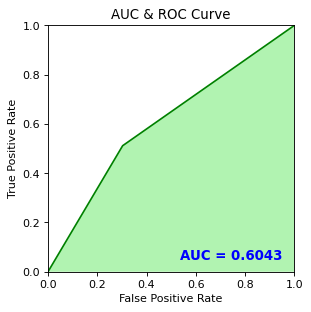

In [151]:
roc_auc = roc_auc_score(y_test, y_per)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_per)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Multi Layer Perceptron

In [152]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [182]:
y_mlp = mlp.predict(X_test)
Accuracy = mlp.score(X_test, y_test)
print('Accuracy of Multi Layer Perceptron on test set: ', Accuracy)

Accuracy of Multi Layer Perceptron on test set:  0.6238532110091743


In [183]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.37614678899082565


In [154]:
print(classification_report(y_test, y_mlp))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        66
           1       0.53      0.47      0.49        43

    accuracy                           0.62       109
   macro avg       0.60      0.60      0.60       109
weighted avg       0.62      0.62      0.62       109



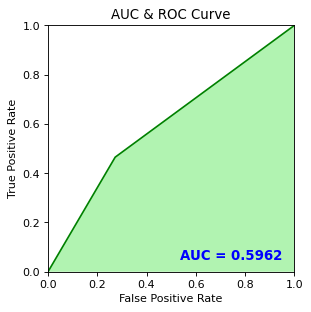

In [155]:
roc_auc = roc_auc_score(y_test, y_mlp)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_mlp)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## AdaBoost Classifier

In [156]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = abc.fit(X_train, y_train)

In [184]:
y_abc = model.predict(X_test)
Accuracy = abc.score(X_test, y_test)
print('Accuracy of AdaBoost Classifier on test set: ', Accuracy)

Accuracy of AdaBoost Classifier on test set:  0.8348623853211009


In [185]:
# Misclassification Rate
Misclassification_Rate = 1 - Accuracy
print("Misclassification_Rate:", Misclassification_Rate)

Misclassification_Rate: 0.1651376146788991


In [158]:
print(classification_report(y_test, y_abc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.84      0.72      0.77        43

    accuracy                           0.83       109
   macro avg       0.84      0.82      0.82       109
weighted avg       0.84      0.83      0.83       109



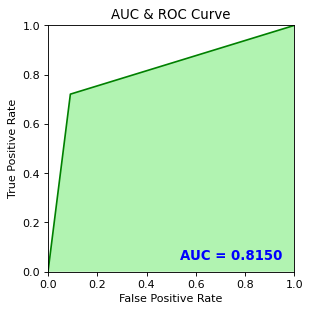

In [159]:
roc_auc = roc_auc_score(y_test, y_abc)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_abc)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()